<h1><font color='red'> Analysis of popularity of programming languages </font></h1>

## Import Statements

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Reading the .csv file and storing it in a Pandas dataframe

In [77]:
df = pd.read_csv("D:/PythonAngela/Data Science Projects/Analysis of popularity of different programming languages over time/QueryResults.csv",names=['DATE', 'TAG', 'POSTS'],header=0)

Examining the first 5 rows and the last 5 rows of the of the dataframe

In [78]:
print(df.head())
print(df.tail())

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                     DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


Checking how many rows and how many columns there are.

In [79]:
df.shape

(1991, 3)

Counting the number of entries in each column of the dataframe

In [80]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

Calculating the total number of post per language.

In [81]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [82]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [83]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [84]:
type(df['DATE'][1])

str

In [85]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [86]:
pivoted_df = df.pivot(index='DATE',columns='TAG',values='POSTS')
pivoted_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [87]:
reshaped_df = df.pivot(index='DATE',columns='TAG',values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [88]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [89]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

Filling 'nan' values with 0

In [90]:
reshaped_df.fillna(0,inplace=True)

In [91]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [92]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


plot a single programming language (e.g., java) on a chart.

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df.java)

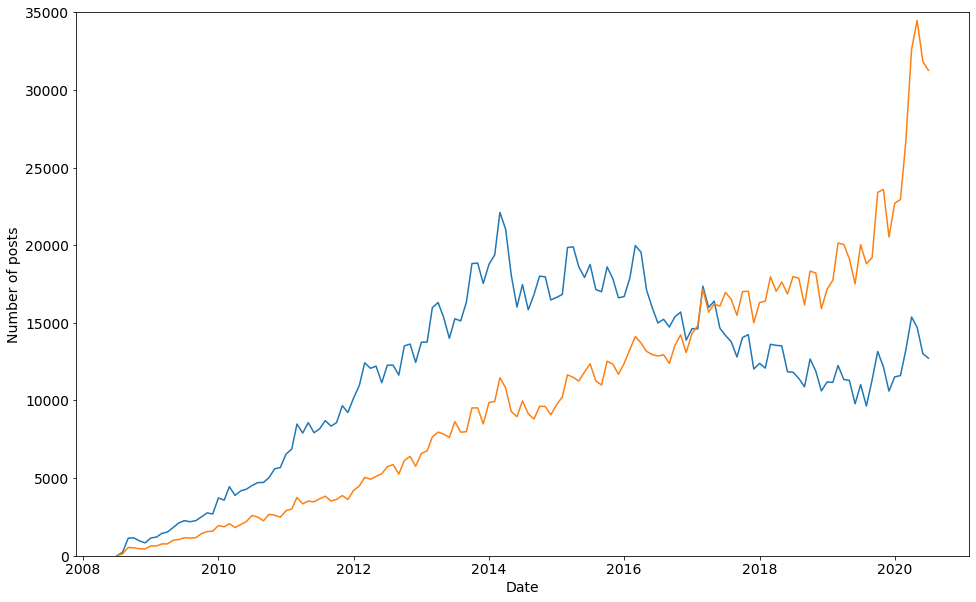

In [93]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

Plotting Two programming languages on the chart. Eg. Java and Python

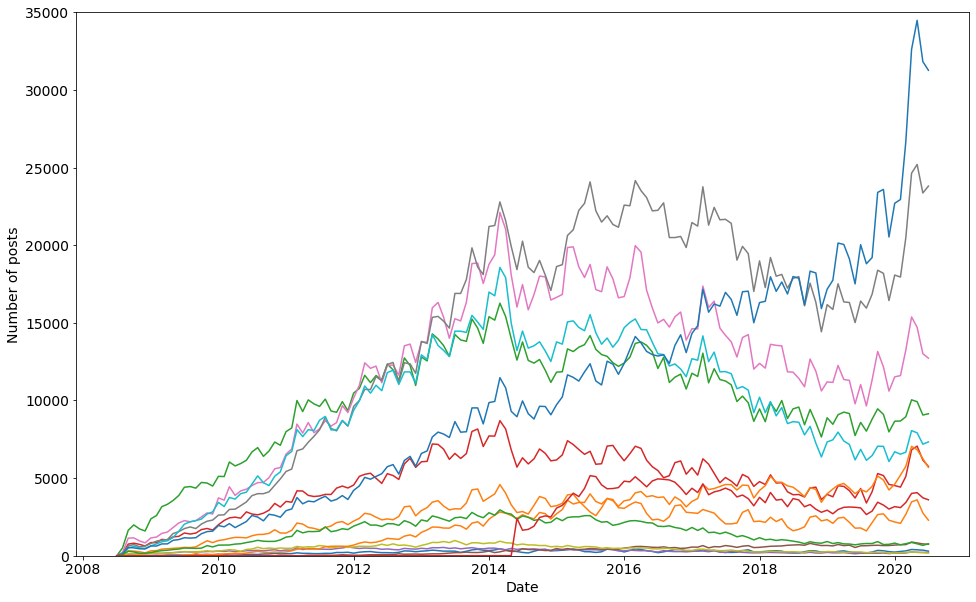

In [94]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column])

Plotting all languages on the same chart.

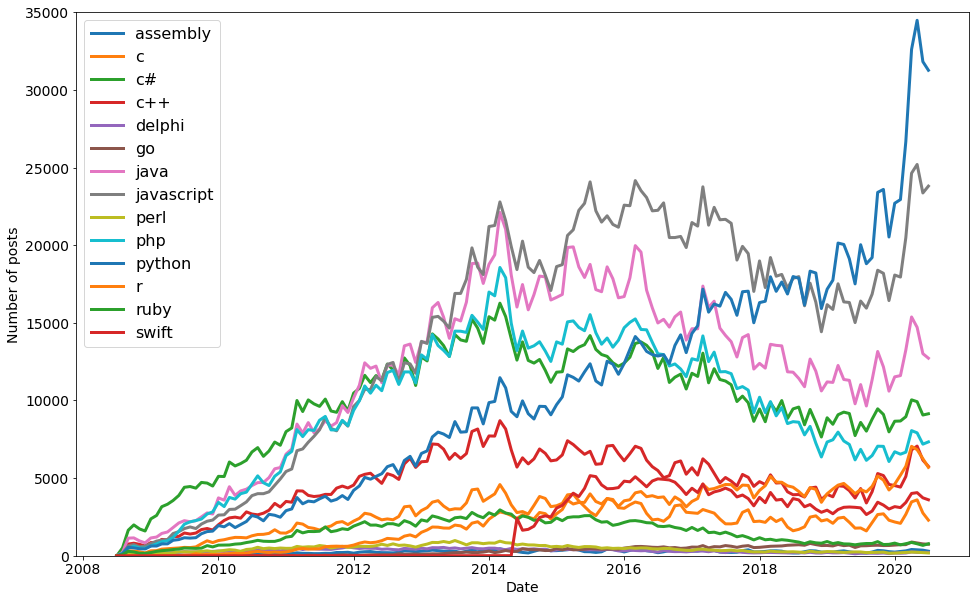

In [95]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column],
            linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [96]:
roll_df = reshaped_df.rolling(window=6).mean()
roll_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667


Plotting graph for window = 6

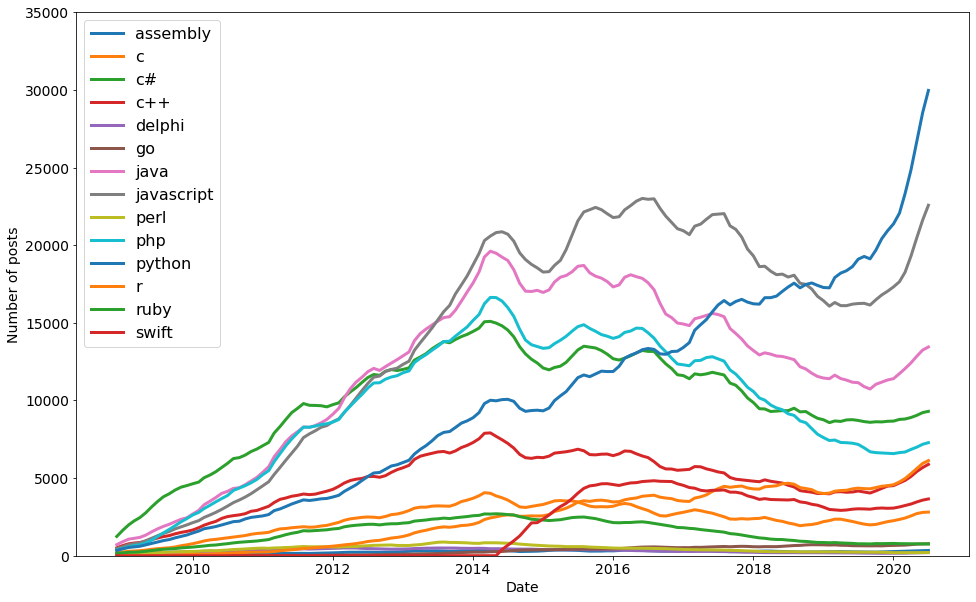

In [97]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(roll_df.index,roll_df[column],
            linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16)

Plotting graph for window = 3

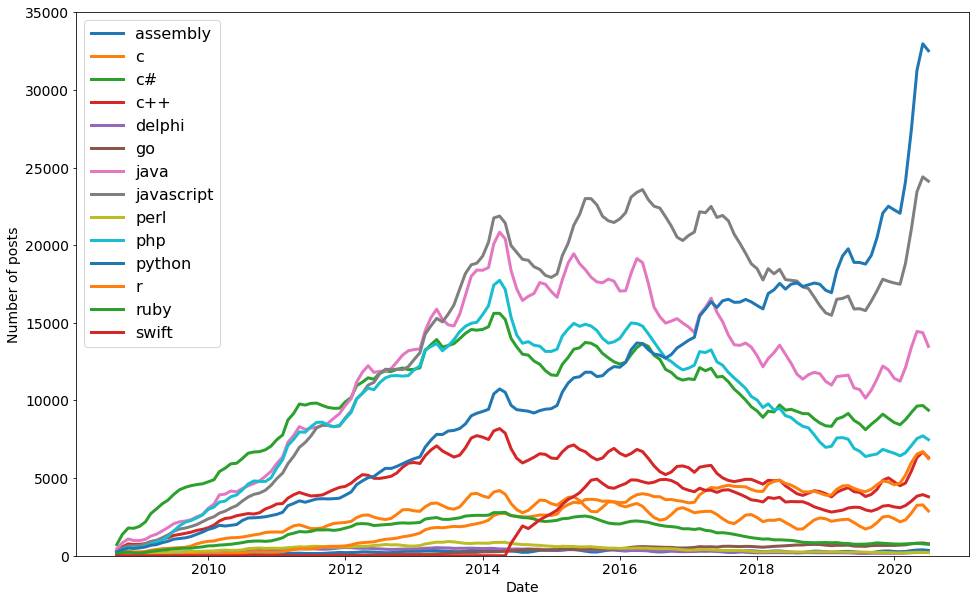

In [98]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(roll_df.index,roll_df[column],
            linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16)

Plotting graph for window = 12

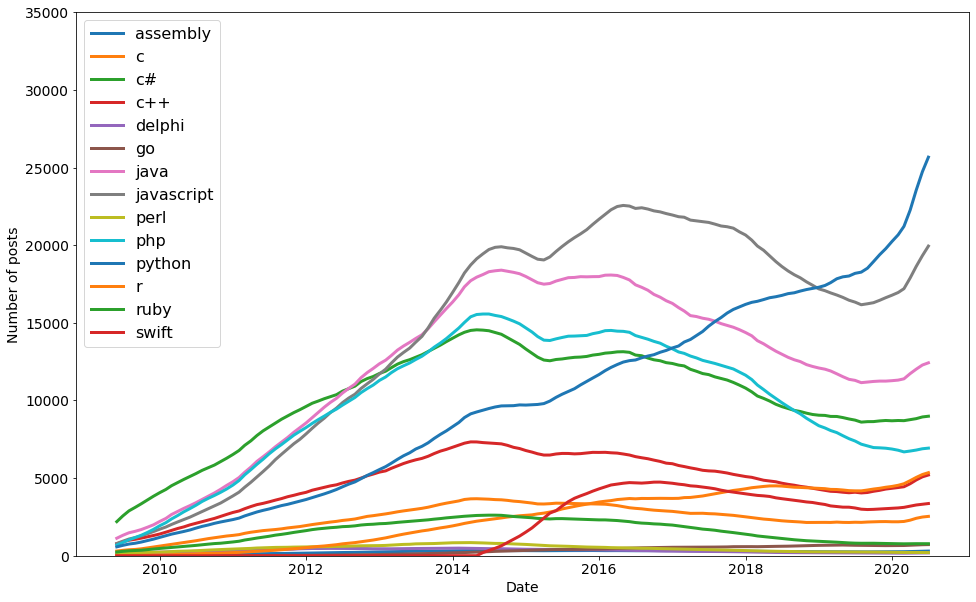

In [99]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(roll_df.index,roll_df[column],
            linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16)